In [1]:

!git clone https://github.com/tobran/GALIP
!pip install -r GALIP/requirements.txt
!pip install gdown


Cloning into 'GALIP'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 123 (delta 18), reused 6 (delta 6), pack-reused 96
Receiving objects: 100% (123/123), 1.20 MiB | 4.13 MiB/s, done.
Resolving deltas: 100% (58/58), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.

In [2]:
!pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ihqqpdr5
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ihqqpdr5
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=82fba3bc324d36823879288c0556ed0136dc034a73b33446eefee2928faa553b
  Stored in directory: /tmp/pip-ephem-wheel-cache-2b1ea6gy/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


## Image Preparation

In [3]:
# Download preprocessed metadata for Birds
import gdown

# The file ID is extracted from the Google Drive link
file_id = '1I6ybkR7L64K8hZOraEZDuHh0cCJw5OUj'
file_url = f'https://drive.google.com/uc?id={file_id}'

# Output file path
output_path = 'GALIP/data/birds_metadata.zip' # Path corrected for Google Colab

# Ensure the directories exist
import os
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Download the file
gdown.download(file_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1I6ybkR7L64K8hZOraEZDuHh0cCJw5OUj
From (redirected): https://drive.google.com/uc?id=1I6ybkR7L64K8hZOraEZDuHh0cCJw5OUj&confirm=t&uuid=ce87cf73-c8ba-4068-9258-7158a8dd63e0
To: /content/GALIP/data/birds_metadata.zip
100%|██████████| 132M/132M [00:01<00:00, 87.5MB/s]


'GALIP/data/birds_metadata.zip'

In [4]:
# The file ID extracted from your Google Drive link
file_id = '15Fw-gErCEArOFykW3YTnLKpRcPgI_3AB'
file_url = f'https://drive.google.com/uc?id={file_id}'

# Output file path within Colab environment
output_path = '/content/GALIP/data/coco_metadata.zip'

# Make sure the target directory exists, if not, create it
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Download the file to the specified output path
gdown.download(file_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=15Fw-gErCEArOFykW3YTnLKpRcPgI_3AB
From (redirected): https://drive.google.com/uc?id=15Fw-gErCEArOFykW3YTnLKpRcPgI_3AB&confirm=t&uuid=ce645099-b7ab-4036-ad46-dee34eee951f
To: /content/GALIP/data/coco_metadata.zip
100%|██████████| 206M/206M [00:02<00:00, 87.1MB/s]


'/content/GALIP/data/coco_metadata.zip'

In [5]:
import zipfile

bird_metadata_path = '/content/GALIP/data/birds_metadata.zip'
coco_metadata_path = '/content/GALIP/data/coco_metadata.zip'
with zipfile.ZipFile(bird_metadata_path, 'r') as zip_ref:
    zip_ref.extractall('/content/GALIP/data/')
with zipfile.ZipFile(coco_metadata_path, 'r') as zip_ref:
    zip_ref.extractall('/content/GALIP/data/')

In [6]:
#Downloading image
# Ensure the data/birds directory exists
!mkdir -p /content/GALIP/data/birds

# Download the dataset using wget
!wget -O /content/GALIP/data/CUB_200_2011.tgz https://data.caltech.edu/records/65de6-vp158/files/CUB_200_2011.tgz?download=1

# Extract the contents of the .tgz file
!tar -xvzf /content/GALIP/data/CUB_200_2011.tgz -C /content/GALIP/data/birds



Streaming output truncated to the last 5000 lines.
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0050_111087.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0079_113288.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0004_111989.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0068_113247.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0127_111935.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0094_112773.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0028_113217.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0126_110959.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0007_111029.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0096_111519.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0120_113001.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0010_112678.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0025_111669.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0084_111300.j

In [28]:
!mkdir -p /content/GALIP/data/coco/images
!wget -O /content/GALIP/data/train2014.zip http://images.cocodataset.org/zips/train2014.zip
!unzip -q /content/GALIP/data/train2014.zip -d /content/GALIP/data/coco/images


--2024-03-27 15:24:01--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.105.67, 3.5.29.165, 52.217.224.121, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.105.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘/content/GALIP/data/train2014.zip’

/content/GALIP/data 100%[===================>]  12.58G  16.2MB/s    in 15m 6s  

2024-03-27 15:39:08 (14.2 MB/s) - ‘/content/GALIP/data/train2014.zip’ saved [13510573713/13510573713]



In [12]:
%cd /content/GALIP/code


/content/GALIP/code


In [13]:
!pwd

/content/GALIP/code


## Train Bird and COCO dataset

There are several parameter that can be finetune which include the following:
- `imsize`: Image size (e.g., 256).
- `z_dim`: Dimensionality of the noise vector (e.g., 100).
- `cond_dim`: Dimensionality of the conditional input (e.g., 512).
- `manual_seed`: Manual seed for reproducibility (e.g., 100).
- `cuda`: Flag indicating whether to use CUDA for GPU acceleration (e.g., True).
- `stamp`: Type of stamp (e.g., 'normal').
- `state_epoch`: Initial state epoch (e.g., 0).
- `max_epoch`: Maximum number of training epochs (e.g., 1502).
- `batch_size`: Number of samples processed in each training iteration (e.g., 16).
- `gpu_id`: ID of the GPU to be used (e.g., 0).
- `nf`: Number of filters in the first layer of the generator and discriminator networks (e.g., 64).
- `ch_size`: Number of channels in the input images (e.g., 3).
- `scaler_min`: Minimum scaler value (e.g., 64).
- `growth_interval`: Interval for growth (e.g., 2000).
- `lr_g`: Learning rate for the generator (e.g., 0.0001).
- `lr_d`: Learning rate for the discriminator (e.g., 0.0004).
- `sim_w`: Weight for similarity (e.g., 4.0).
- `gen_interval`: Interval for generating images (e.g., 5).
- `test_interval`: Interval for testing (e.g., 20).
- `save_interval`: Interval for saving checkpoints (e.g., 20).
- `sample_times`: Number of times to sample images during evaluation (e.g., 12).
- `npz_path`: Path to the NPZ file containing validation data (e.g., '../data/birds/npz/bird_val256_FIDK0.npz').
- `log_dir`: Directory for logs (e.g., 'new').


In [26]:
!bash scripts/train.sh ./cfg/birds.yml


2024-03-27 15:14:24.249583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 15:14:24.249628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 15:14:24.250856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-27 15:14:24.258213: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-27 15:14:25.434412: W tensorflow/compiler/tf2

In [29]:
!bash scripts/train.sh ./cfg/coco.yml


2024-03-27 15:40:32.646926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 15:40:32.646992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 15:40:32.648291: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-27 15:40:32.655272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-27 15:40:33.817755: W tensorflow/compiler/tf2

## Experiment with the pretrain model

In [30]:
# Create the target directory if it doesn't exist
!mkdir -p /content/GALIP/code/saved_models/bird/



In [38]:
# Download Pretrained data
!gdown --id 1gbfwDeD7ftZmdOFxfffCjKCyYfF4ptdl -O /content/GALIP/code/saved_models/pre_coco.pth
!gdown --id 1VnONvNRjuyHTzuLKBbozZ38-WIt7XZMC -O /content/GALIP/code/saved_models/pre_cc12m.pth


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1gbfwDeD7ftZmdOFxfffCjKCyYfF4ptdl
From (redirected): https://drive.google.com/uc?id=1gbfwDeD7ftZmdOFxfffCjKCyYfF4ptdl&confirm=t&uuid=3aedc002-46d7-4676-aa38-460fec3b3e0d
To: /content/GALIP/code/saved_models/pre_coco.pth
100% 506M/506M [00:07<00:00, 68.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1VnONvNRjuyHTzuLKBbozZ38-WIt7XZMC
From (redirected): https://drive.google.com/uc?id=1VnONvNRjuyHTzuLKBbozZ38-WIt7XZMC&confirm=t&uuid=fa635668-12ad-4d89-aeb2-0bbd173fcc7c
To: /content/

In [34]:
import torch
import os
from PIL import Image
import clip
import os.path as osp
import os, sys
import torchvision.utils as vutils
sys.path.insert(0, '../')

from lib.utils import load_model_weights,mkdir_p
from models.GALIP import NetG, CLIP_TXT_ENCODER

In [35]:
device = 'cpu' # 'cpu' # 'cuda:0'
CLIP_text = "ViT-B/32"
clip_model, preprocess = clip.load("ViT-B/32", device=device)
clip_model = clip_model.eval()

In [39]:
text_encoder = CLIP_TXT_ENCODER(clip_model).to(device)
netG = NetG(64, 100, 512, 256, 3, False, clip_model).to(device)
path = '/content/GALIP/code/saved_models/pre_coco.pth'
checkpoint = torch.load(path, map_location=torch.device('cpu'))
netG = load_model_weights(netG, checkpoint['model']['netG'], multi_gpus=False)

In [40]:
batch_size = 8
noise = torch.randn((batch_size, 100)).to(device)

In [49]:
captions = ['The skiers are standing next to a large crowd',
            'an old diesel locomotive coming upon a track switch',
            'The moon over a pasture containing two cows grazing in the twilight.',
            'On the plate is eggs,tomatoes sausage, and some bacon.']


In [50]:
mkdir_p('./samples')


In [54]:
# generate from text
with torch.no_grad():
    for i in range(len(captions)):
        caption = captions[i]
        tokenized_text = clip.tokenize([caption]).to(device)
        sent_emb, word_emb = text_encoder(tokenized_text)
        sent_emb = sent_emb.repeat(batch_size,1)
        fake_imgs = netG(noise,sent_emb,eval=True).float()
        name = f'{captions[i].replace(" ", "-")}'
        vutils.save_image(fake_imgs.data, './samples/%s.png'%(name), nrow=8, value_range=(-1, 1), normalize=True)

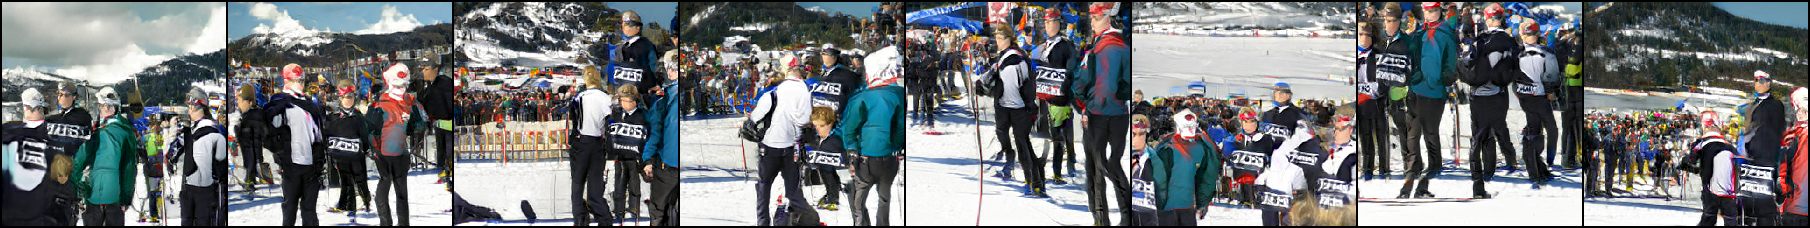

Caption: The-skiers-are-standing-next-to-a-large-crowd


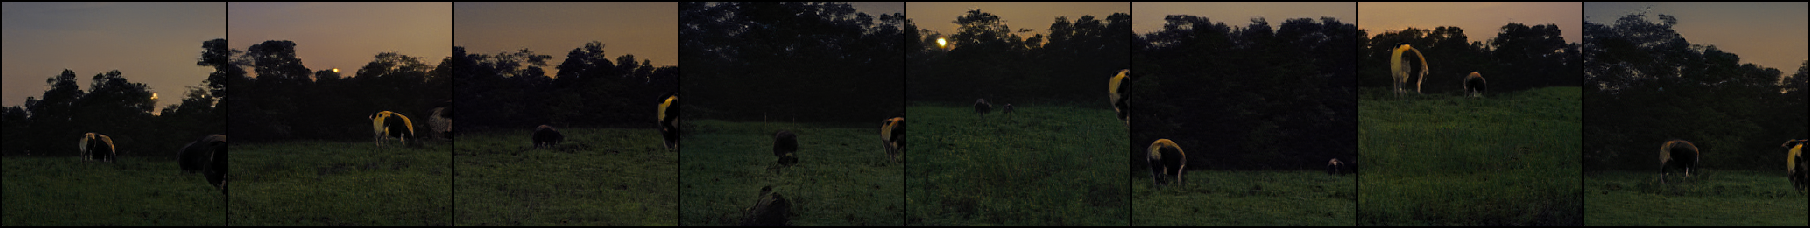

Caption: The-moon-over-a-pasture-containing-two-cows-grazing-in-the-twilight


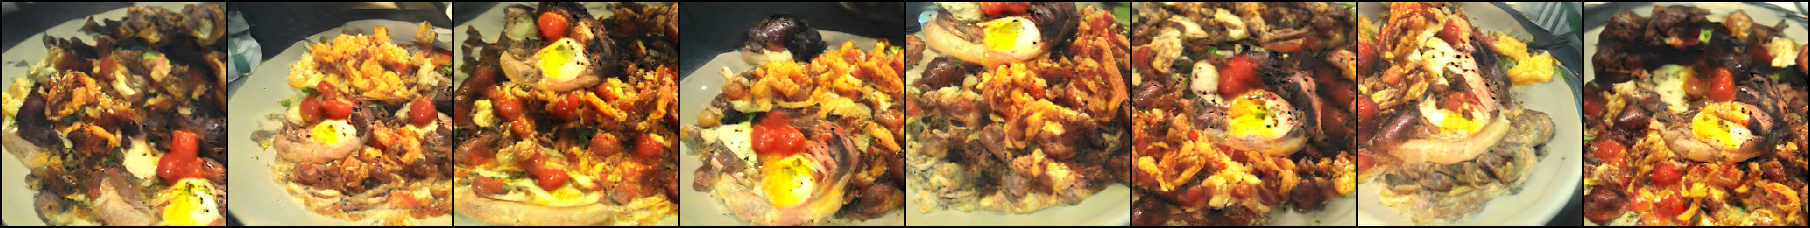

Caption: On-the-plate-is-eggs,tomatoes-sausage,-and-some-bacon


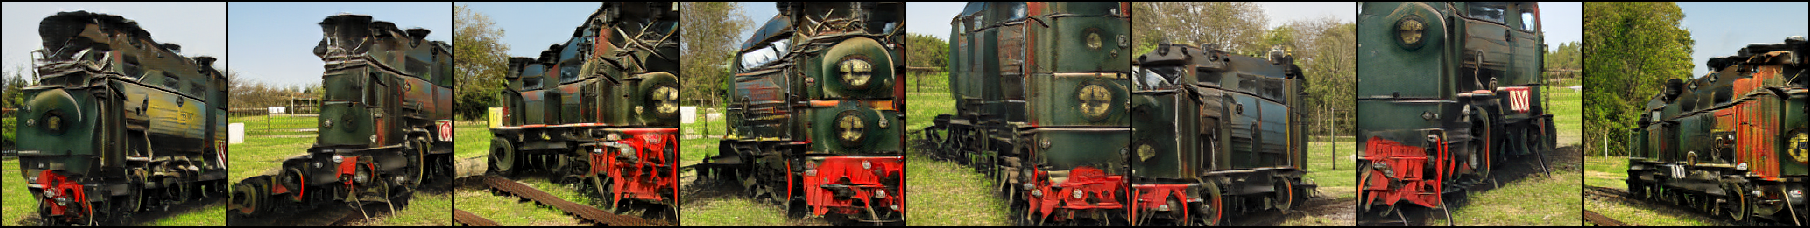

Caption: an-old-diesel-locomotive-coming-upon-a-track-switch


In [56]:
from IPython.display import Image, display
import os

# Directory containing the images
image_dir = '/content/GALIP/code/samples'

# Get a list of files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')]

# Display each image and its filename as caption
for image_file in image_files:
    display(Image(filename=os.path.join(image_dir, image_file)))
    print(f"Caption: {image_file.split('.')[0]}")


## Evaluation

In [61]:
mkdir_p('./tmp')


In [62]:
!bash scripts/test.sh ./cfg/coco.yml

/usr/local/lib/python3.10/dist-packages/torch/distributed/launch.py:178: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  warnings.warn(
2024-03-27 16:15:29.737583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 16:15:29.737642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 16:15:29.738929: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to regis